In [1]:
import datetime
import time as time_module
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import theano
import theano.tensor as tt
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
!pip install git+https://github.com/Priesemann-Group/covid19_inference.git

  Cloning https://github.com/Priesemann-Group/covid19_inference.git to c:\users\admini~1\appdata\local\temp\pip-req-build-exbln210
  Created wheel for covid19-inference: filename=covid19_inference-0.1.8a0-py3-none-any.whl size=104540 sha256=5fa1f5f1d4a405501b00f18dd051c363c6b0abd2cab1873bd541ac89aed9dcfe
  Stored in directory: C:\Users\ADMINI~1\AppData\Local\Temp\pip-ephem-wheel-cache-1_isdwi2\wheels\49\b1\39\e7c95d0fd9fc85ca2618197f9099261dc2ec4099c681f9a8a1
Successfully built covid19-inference


  Running command git clone -q https://github.com/Priesemann-Group/covid19_inference.git 'C:\Users\ADMINI~1\AppData\Local\Temp\pip-req-build-exbln210'


In [2]:
try:
    import covid19_inference as cov19
except ModuleNotFoundError:
    sys.path.append("../../")
    import covid19_inference as cov19

In [3]:
# rki = cov19.data_retrieval.RKI()  # It is important to download the dataset!
# rki.download_all_available_data()

jhu = cov19.data_retrieval.JHU()
jhu.download_all_available_data()
# One could also parse True to the constructor of the class to force an auto download

INFO     [covid19_inference.data_retrieval._JHU] Successfully loaded data from local


In [4]:
rki = cov19.data_retrieval.RKI()  # It is important to download the dataset!
rki.download_all_available_data()
rki.data

INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded data from local


,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,confirmed,deaths,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,NeuGenesen,recovered,IstErkrankungsbeginn,Altersgruppe2,date,date_ref
0,26817550,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,1001,"07.08.2020, 00:00 Uhr",0,-9,0,1,1,Nicht übermittelt,2020-03-14,2020-03-16
1,26817551,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,1001,"07.08.2020, 00:00 Uhr",0,-9,0,1,1,Nicht übermittelt,2020-03-19,2020-03-13
2,26817552,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,1001,"07.08.2020, 00:00 Uhr",0,-9,0,1,1,Nicht übermittelt,2020-03-19,2020-03-16
3,26817553,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,1001,"07.08.2020, 00:00 Uhr",0,-9,0,1,1,Nicht übermittelt,2020-03-21,2020-03-13
4,26817554,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,1001,"07.08.2020, 00:00 Uhr",0,-9,0,1,1,Nicht übermittelt,2020-03-27,2020-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173204,26990754,16,Thüringen,LK Altenburger Land,A80+,M,1,0,16077,"07.08.2020, 00:00 Uhr",0,-9,0,1,1,Nicht übermittelt,2020-06-09,2020-05-19
173205,26990755,16,Thüringen,LK Altenburger Land,A80+,W,1,0,16077,"07.08.2020, 00:00 Uhr",0,-9,0,1,1,Nicht übermittelt,2020-05-06,2020-05-04
173206,26990756,16,Thüringen,LK Altenburger Land,A80+,W,1,0,16077,"07.08.2020, 00:00 Uhr",0,-9,0,1,1,Nicht übermittelt,2020-05-11,2020-05-01
173207,26990757,16,Thüringen,LK Altenburger Land,A80+,W,2,0,16077,"07.08.2020, 00:00 Uhr",0,-9,0,2,0,Nicht übermittelt,2020-05-28,2020-05-28


In [5]:
jhu = cov19.data_retrieval.JHU()  
jhu.download_all_available_data()

INFO     [covid19_inference.data_retrieval._JHU] Successfully loaded data from local


In [ ]:
raw = (pd.read_excel("https://github.com/busgandy/10Acad/blob/master/Week%203/eth-covid19-data.xlsx?raw=true"))
raw.set_index('date',inplace=True)
new_case = raw.iloc[:,0]
plt.figure(figsize=[10,8])
plt.title('Covid-19 Confirmed Cases Distribution for Ethiopia')
new_case.plot()

INFO     [numexpr.utils] NumExpr defaulting to 4 threads.


Text(0.5, 1.0, 'Covid-19 Confirmed Cases Distribution for Ethiopia')

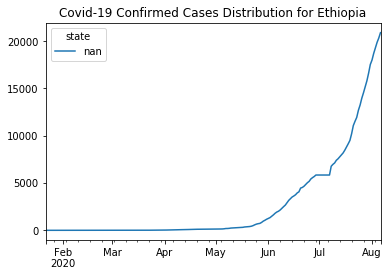

In [6]:
dfeth = jhu.confirmed.Ethiopia
dfeth.plot()
plt.title('Covid-19 Confirmed Cases Distribution for Ethiopia')

In [7]:
dfeth = dfeth.dropna()
dfeth.columns = ['value']
# df.head()
#= 'values'
dfeth = dfeth[dfeth['value']>100]
dfeth.head()

,value
2020-04-18,105
2020-04-19,108
2020-04-20,111
2020-04-21,114
2020-04-22,116


In [8]:
dfeth.tail()

,value
2020-08-02,18706
2020-08-03,19289
2020-08-04,19877
2020-08-05,20336
2020-08-06,20900


Text(0.5, 1.0, 'Covid-19 Death Distribution for Ethiopia')

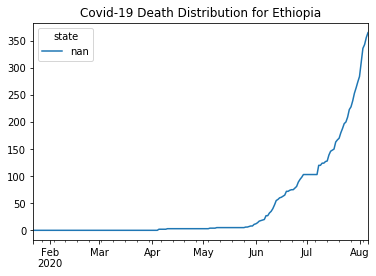

In [9]:
dfdeath = jhu.deaths.Ethiopia
dfdeath.plot()
plt.title('Covid-19 Death Distribution for Ethiopia')

In [10]:
bd = datetime.datetime(2020, 3, 10)  # For the date filter
#ed = datetime.datetime.now()

#bd = datetime.datetime(2020, 4, 18)
#bd = datetime.datetime(2020, 3, 29)  # For the date filter
# ed = datetime.datetime.now()

ed = datetime.datetime(2020, 7, 25)

In [11]:
total_cases_obs = jhu.get_total(
    value="confirmed", country='Ethiopia', data_begin=bd, data_end=ed
)
new_cases_obs = jhu.get_new(
    value="confirmed", country='Ethiopia', data_begin=bd, data_end=ed
)

date = total_cases_obs[total_cases_obs  >= 100].reset_index().head(1)['date'][0]
new_cases_obs = new_cases_obs[new_cases_obs.index > date]

In [12]:
total_cases_obs[total_cases_obs.isnull()]

Series([], Name: confirmed, dtype: int64)

In [13]:
new_cases_obs[new_cases_obs.isnull()]

Series([], Name: confirmed, dtype: int32)

In [14]:
new_cases_obs = new_cases_obs[new_cases_obs.index < '2020-7-25']
testing_cases = new_cases_obs[new_cases_obs.index >= '2020-7-25']
new_cases_obs

date
2020-04-19      3
2020-04-20      3
2020-04-21      3
2020-04-22      2
2020-04-23      0
             ... 
2020-07-20    704
2020-07-21    865
2020-07-22    452
2020-07-23    409
2020-07-24    760
Name: confirmed, Length: 97, dtype: int32

In [15]:
diff_data_sim = 16  # should be significantly larger than the expected delay, in
# order to always fit the same number of data points.
# * The simulation starts `diff_data_sim` days before the data.
num_days_forecast = 10

In [16]:
# We set the priors for the changepoints here
prior_date_mild_dist_begin = datetime.datetime(2020, 3, 9)
prior_date_strong_dist_begin = datetime.datetime(2020, 3, 16)
prior_date_contact_ban_begin = datetime.datetime(2020, 3, 23)

In [17]:
change_points = [
    dict(
        pr_mean_date_transient=prior_date_mild_dist_begin,
        pr_sigma_date_transient=3,
        pr_median_lambda=0.2,
        pr_sigma_lambda=1,
    ),
    dict(
        pr_mean_date_transient=prior_date_strong_dist_begin,
        pr_sigma_date_transient=1.5,
        pr_median_lambda=1 / 8,
        pr_sigma_lambda=1,
    ),
    dict(
        pr_mean_date_transient=prior_date_contact_ban_begin,
        pr_sigma_date_transient=1.5,
        pr_median_lambda=1 / 8 / 2,
        pr_sigma_lambda=1,
    ),
]

In [18]:
params_model = dict(
    new_cases_obs=new_cases_obs[:],
    data_begin=bd,
    fcast_len=num_days_forecast,
    diff_data_sim=diff_data_sim,
    N_population=4e6,
)
# Median of the prior for the delay in case reporting, we assume 10 days
pr_delay = 10

In [19]:
with cov19.model.Cov19Model(**params_model) as this_model:
    # Create the an array of the time dependent infection rate lambda
    lambda_t_log = cov19.model.lambda_t_with_sigmoids(
        pr_median_lambda_0=0.4,
        pr_sigma_lambda_0=0.5,
        change_points_list=change_points,  # The change point priors we constructed earlier
        name_lambda_t="lambda_t",  # Name for the variable in the trace (see later)
    )

    # set prior distribution for the recovery rate
    mu = pm.Lognormal(name="mu", mu=np.log(1 / 8), sigma=0.2)

    # This builds a decorrelated prior for I_begin for faster inference.
    # It is not necessary to use it, one can simply remove it and use the default argument
    # for pr_I_begin in cov19.SIR
    prior_I = cov19.model.uncorrelated_prior_I(
        lambda_t_log=lambda_t_log,
        mu=mu,
        pr_median_delay=pr_delay,
        name_I_begin="I_begin",
        name_I_begin_ratio_log="I_begin_ratio_log",
        pr_sigma_I_begin=2,
        n_data_points_used=5,
    )

    # Use lambda_t_log and mu to run the SIR model
    new_cases = cov19.model.SIR(
        lambda_t_log=lambda_t_log,
        mu=mu,
        name_new_I_t="new_I_t",
        name_I_t="I_t",
        name_I_begin="I_begin",
        pr_I_begin=prior_I,
    )

    # Delay the cases by a lognormal reporting delay
    new_cases = cov19.model.delay_cases(
        cases=new_cases,
        name_cases="delayed_cases",
        name_delay="delay",
        name_width="delay-width",
        pr_mean_of_median=pr_delay,
        pr_sigma_of_median=0.2,
        pr_median_of_width=0.3,
    )

    # Modulate the inferred cases by a abs(sin(x)) function, to account for weekend effects
    # Also adds the "new_cases" variable to the trace that has all model features.
    new_cases = cov19.model.week_modulation(
        cases=new_cases,
        name_cases="new_cases",
        name_weekend_factor="weekend_factor",
        name_offset_modulation="offset_modulation",
        week_modulation_type="abs_sine",
        pr_mean_weekend_factor=0.3,
        pr_sigma_weekend_factor=0.5,
        weekend_days=(6, 7),
    )

    # Define the likelihood, uses the new_cases_obs set as model parameter
    cov19.model.student_t_likelihood(new_cases)

INFO     [covid19_inference.model.spreading_rate] Lambda_t with sigmoids
INFO     [covid19_inference.model.model] pr_median_transient_len was set to default value 4
INFO     [covid19_inference.model.model] pr_sigma_transient_len was set to default value 0.5
INFO     [covid19_inference.model.model] relative_to_previous was set to default value False
INFO     [covid19_inference.model.model] pr_factor_to_previous was set to default value 1
INFO     [covid19_inference.model.model] pr_median_transient_len was set to default value 4
INFO     [covid19_inference.model.model] pr_sigma_transient_len was set to default value 0.5
INFO     [covid19_inference.model.model] relative_to_previous was set to default value False
INFO     [covid19_inference.model.model] pr_factor_to_previous was set to default value 1
INFO     [covid19_inference.model.model] pr_median_transient_len was set to default value 4
INFO     [covid19_inference.model.model] pr_sigma_transient_len was set to default value 0.5
INFO  

In [ ]:
trace = pm.sample(model=this_model,cores=8, tune=20, draws=40, init="advi+adapt_diag")

Only 40 samples in chain.
WARNING  [pymc3] Only 40 samples in chain.
Auto-assigning NUTS sampler...
INFO     [pymc3] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
INFO     [pymc3] Initializing NUTS using advi+adapt_diag...


In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(8, 8.4))
varnames = this_model.untransformed_freeRVs
print("Possible varnames are :")
print(varnames)

In [ ]:
for i, key in enumerate(
    # left column
    ["weekend_factor", "mu", "lambda_0", "lambda_1", "lambda_2", "lambda_3"]
):
    cov19.plot._distribution(this_model, trace, key, ax=axes[i, 0])

In [ ]:
for i, key in enumerate(
    # mid column
    [
        "offset_modulation",
        "sigma_obs",
        "I_begin",
        "transient_day_1",
        "transient_day_2",
        "transient_day_3",
    ]
):
    cov19.plot._distribution(this_model, trace, key, ax=axes[i, 1])

In [ ]:

for i, key in enumerate(
    # right column
    ["delay", "transient_len_1", "transient_len_2", "transient_len_3",]
):
    cov19.plot._distribution(this_model, trace, key, ax=axes[i + 2, 2])

In [ ]:
fig.tight_layout()
fig #To print in jupyter notebook

In [ ]:
fig, axes = cov19.plot.timeseries_overview(this_model, trace, offset=-3000)

In [ ]:
#daily_data can be a replacement for new_cases_obs
raw = (pd.read_excel("eth-covid19-data.xlsx", sheet_name="DailyCases"))
raw.set_index('date', inplace=True)
daily_data = raw.iloc[:,0]